<h1><center>MNIST classification using Keras<center></h1>

# Importing Keras

In [7]:
# Importing the Keras main module forcing tensorflow 1.x backend
import tensorflow as tf
import keras
import numpy as np
print("Using tensorflow version " + str(tf.__version__))
print("Using keras version " + str(keras.__version__))

Using tensorflow version 2.4.1
Using keras version 2.4.3


## Loading and preparing the MNIST dataset

Again, load the dataset via ```keras.datasets```, turn train and test labels into one-hot encoding, and reshape and normalize data as in the first exercise. 

In [1]:
#loading mnist data
from keras.datasets import mnist

# START CODE HERE
(train_images,train_labels),(test_images,test_labels)=mnist.load_data()
print('train_images '+str(train_images.shape))
print('train_labels '+str(train_labels.shape))
print('test_images '+str(test_images.shape))
print('test_labels '+str(test_labels.shape))
# END CODE HERE

train_images (60000, 28, 28)
train_labels (60000,)
test_images (10000, 28, 28)
test_labels (10000,)


In [5]:
#one hot-encoding
from keras.utils.np_utils import to_categorical
# START CODE HERE
encoded_train_labels=to_categorical(train_labels,num_classes=10)
encoded_test_labels=to_categorical(test_labels,num_classes=10)
# END CODE HERE

In [8]:
# Reshape to proper images with 1 color channel according to backend scheme

# START CODE HERE
N=train_images.shape[0]
img_rows, img_cols = train_images.shape[1], train_images.shape[2]
#img_vector=np.zeros(N)
train_img_vector = np.reshape(train_images,newshape=[N, img_rows*img_cols])
# END CODE HERE

# Cast pixels from uint8 to float32
train_img_vector = train_img_vector.astype('float32')

# Now let us normalize the images so that they have zero mean and standard deviation
# Hint: are real testing data statistics known at training time ?
# START CODE HERE
m=len(train_img_vector[0])
for i in range (N):
    image=train_img_vector[i]
    mean=np.mean(image)
    std=np.std(image)
    for k in range (m):
        image[k]=(image[k]-mean)/std #centering and normalizing each pixel of the image
# END CODE HERE

## Defining the neural network architecture (i.e., the network model)

You can take a look at this [cheatsheet](https://s3.amazonaws.com/assets.datacamp.com/blog_assets/Keras_Cheat_Sheet_Python.pdf) for some basic commands to use keras.

First, try to replicate the classifier of the first exercise. Secondly, create a fully connected network.
For the fully connected layer, you can for example use this architecture: 
$$ (784) \rightarrow (300) \rightarrow (10) $$
For this first implementation of the network, use only sigmoid activations in the hidden layer. Remember to use the right output activation function ! 

In [29]:
# The Sequential module is a container for more complex NN elements and
# defines a loop-less NN architecture
from keras.models import Sequential
from keras.layers import Dense, Activation, Flatten

# START CODE HERE
input_shape = len(train_img_vector[0])
output_shape = len(encoded_train_labels[0])

model = Sequential() #creating the NN
model.add(Dense(300,activation='sigmoid'))
model.add(Dense(output_shape,activation='sigmoid'))
# END CODE HERE

Instantiate a SGD optimizer with a tentative learning rate of $\\eta = 10^{-2}$ and, using the appropriate loss function (which is called, in keras, ```'categorical_crossentropy'```) and compile the model.

In [35]:
# The optimizers module provides a number of optimization algorithms for updating
# a netwok parameters according to the computed error gradients
from keras import optimizers

# START CODE HERE
model.compile(optimizer='SGD',loss='categorical_crossentropy',metrics=['accuracy'])
# END CODE HERE
# We can now have a look at the defined model topology
model.summary()

Model: "sequential_5"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_5 (Dense)              (32, 300)                 235500    
_________________________________________________________________
dense_6 (Dense)              (32, 10)                  3010      
Total params: 238,510
Trainable params: 238,510
Non-trainable params: 0
_________________________________________________________________


## Training the network

Train the model for 10 epochs using the ```.fit()``` method, validating the model at each epoch and keeping track of the training history for later plotting. Make sure you enable ```.fit()``` verbose mode in order to visualize the training.

In order to accelerate training, use the ```batch_size``` option of ```.fit()```, which will process a batch of examples at the same time, and make one update for all of them, averaged over the gradients for each training example of the batch. You can begin with a small size, and experiment with a larger size later.

In [39]:
# This is where the actual training-testing happens
# Number of epochs we want to train
epochs = 10

# START CODE HERE
network=model.fit(train_img_vector,encoded_train_labels,epochs=epochs,batch_size=20,verbose=2)
# END CODE HERE

Epoch 1/10
3000/3000 - 11s - loss: 0.1247 - accuracy: 0.9655
Epoch 2/10
3000/3000 - 11s - loss: 0.1188 - accuracy: 0.9674
Epoch 3/10
3000/3000 - 11s - loss: 0.1133 - accuracy: 0.9690
Epoch 4/10
3000/3000 - 11s - loss: 0.1083 - accuracy: 0.9702
Epoch 5/10
3000/3000 - 11s - loss: 0.1037 - accuracy: 0.9716
Epoch 6/10
3000/3000 - 11s - loss: 0.0994 - accuracy: 0.9733
Epoch 7/10
3000/3000 - 11s - loss: 0.0956 - accuracy: 0.9739
Epoch 8/10
3000/3000 - 11s - loss: 0.0919 - accuracy: 0.9755
Epoch 9/10
3000/3000 - 11s - loss: 0.0884 - accuracy: 0.9760
Epoch 10/10
3000/3000 - 11s - loss: 0.0852 - accuracy: 0.9769


## Visualizing the network performance

Visualize the training history using the ```pyplot``` package:
- In one graph, plot the train and vaidation loss functions,
- In another graph, the train and validation accuracy.
By comparing the training the testing curves, what can we conclude about the quality of the training ?

dict_keys(['loss', 'accuracy'])


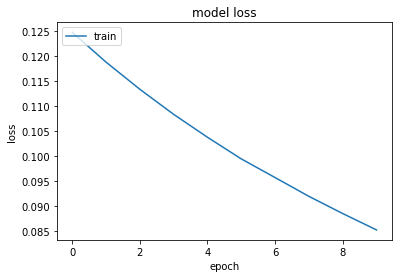

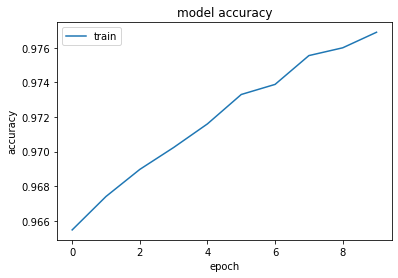

In [44]:
# We now want to plot the train and validation loss functions and accuracy curves
print(network.history.keys())
from matplotlib import pyplot as plt

# summarize history for loss
# START CODE HERE
plt.plot(network.history['loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'val'], loc='upper left') #where comes the validation from?
# END CODE HERE
plt.show()

# summarize history for accuracy
plt.figure()
# START CODE HERE
plt.plot(network.history['accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'val'], loc='upper left') #where comes the validation from?
# END CODE HERE
plt.show()


## Experiments

Note down the performance of the larger network in terms of training and validation accuracy as a reference (save the loss/accuracy graphs of the network).

Then, experiment as follow and compare performance with the reference scenario:

*  Experiment increasing the size of the batch and compare the performance with reference.
*  Experiment replacing the sigmoid activations with Relus and note what happens.
*  Experiment with a larger architecture, for example: 
$$ (784) \rightarrow (300) \rightarrow (128) \rightarrow (84) \rightarrow (10) $$

In [48]:
#defining a new NN with a larger architecture

# START CODE HERE
input_shape = len(train_img_vector[0])
output_shape = len(encoded_train_labels[0])

model2 = Sequential() #creating the NN
model2.add(Dense(300,activation='relu'))
model2.add(Dense(128,activation='relu'))
model2.add(Dense(84,activation='relu'))
model2.add(Dense(output_shape,activation='sigmoid'))
# END CODE HERE

#compiling the model 

# START CODE HERE
model2.compile(optimizer='SGD',loss='categorical_crossentropy',metrics=['accuracy'])
# END CODE HERE
model.summary()

In [49]:
history=model2.fit(train_img_vector,encoded_train_labels,epochs=epochs,batch_size=32,verbose=2)

Epoch 1/10
1875/1875 - 10s - loss: 0.3425 - accuracy: 0.8997
Epoch 2/10
1875/1875 - 10s - loss: 0.1505 - accuracy: 0.9548
Epoch 3/10
1875/1875 - 10s - loss: 0.1085 - accuracy: 0.9676
Epoch 4/10
1875/1875 - 10s - loss: 0.0846 - accuracy: 0.9743
Epoch 5/10
1875/1875 - 10s - loss: 0.0680 - accuracy: 0.9795
Epoch 6/10
1875/1875 - 10s - loss: 0.0552 - accuracy: 0.9838
Epoch 7/10
1875/1875 - 10s - loss: 0.0461 - accuracy: 0.9865
Epoch 8/10
1875/1875 - 10s - loss: 0.0378 - accuracy: 0.9895
Epoch 9/10
1875/1875 - 10s - loss: 0.0315 - accuracy: 0.9916
Epoch 10/10
1875/1875 - 10s - loss: 0.0258 - accuracy: 0.9931


dict_keys(['loss', 'accuracy'])


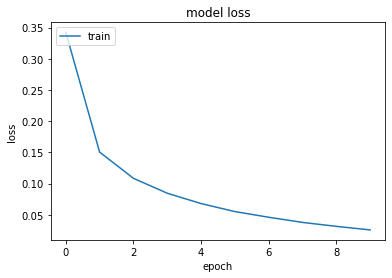

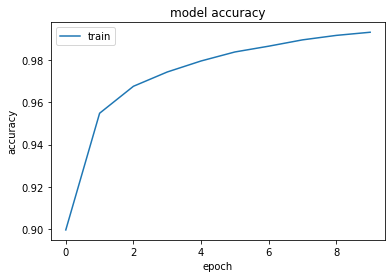

In [51]:
# We now want to plot the train and validation loss functions and accuracy curves
print(history.history.keys())

# summarize history for loss
# START CODE HERE
plt.plot(history.history['loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'val'], loc='upper left') #where comes the validation from?
# END CODE HERE
plt.show()

# summarize history for accuracy
plt.figure()
# START CODE HERE
plt.plot(history.history['accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'val'], loc='upper left') #where comes the validation from?
# END CODE HERE
plt.show()